In [1]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression with multiple feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
y = 9.8 * x1 + 3.2*x2 + 7.6
print("y = ", end='')
sp.pprint(y)


y = 9.8⋅x₁ + 3.2⋅x₂ + 7.6


In [3]:
def ModelEquation(x1,x2):
    return 9.8*x1 + 3.2*x2 + 7.6

In [4]:
total_data_points = 50000
rng = np.random.default_rng(0)             # reproducible
x1 = rng.uniform(0, 2, total_data_points)  # U(0,2)
x2 = rng.uniform(0, 2, total_data_points)  # completely separate draw
y = ModelEquation(x1,x2)

# perm = np.random.permutation(len(x1))
# x1 = x1[perm]
# x2 = x2[perm]
# y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.28609604]
 [0.19629373]]  bias  0.0040290489485773386 loss 438.81181797837405
Iteration  1000  weights  [[3.77202665]
 [3.24817279]]  bias  2.978296213779957 loss 124.9507632281384
Iteration  2000  weights  [[5.67908073]
 [4.75575629]]  bias  4.550233985052085 loss 38.193030447327786
Iteration  3000  weights  [[6.75316623]
 [5.45959407]]  bias  5.386889267714062 loss 13.89165382766105
Iteration  4000  weights  [[7.38559807]
 [5.74747659]]  bias  5.837893567434881 loss 6.806156048205447
Iteration  5000  weights  [[7.78181177]
 [5.82232218]]  bias  6.086508146631054 loss 4.500767128221874
Iteration  6000  weights  [[8.04979454]
 [5.79017201]]  bias  6.228792843136074 loss 3.552813510654479
Iteration  7000  weights  [[8.24643688]
 [5.70631034]]  bias  6.315101621682643 loss 3.0165084648463356
Iteration  8000  weights  [[8.40182864]
 [5.59943676]]  bias  6.371832057128644 loss 2.6272084873838026
Iteration  9000  weights  [[8.53199481]
 [5.48433451]]  bias  6.4128

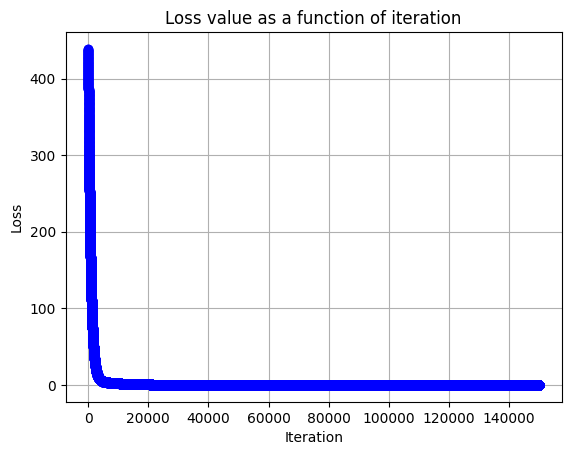

In [6]:
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual     = testing_labels            # full y-vector, shape (n_samples,)
predicted  = model.predict(testing_attributes)
loss       = model.calculateMseLoss(actual, predicted)

print("Prediction loss", model.calculateMseLoss(actual,model.predict(testing_attributes)))

Predicted weights  [[9.82918285]
 [3.22928575]]  bias  7.5348522541974905
Prediction loss 0.0006267602778165861
